<a href="https://colab.research.google.com/github/jgayosof/calculus-and-algebra-problems-with-python/blob/main/lessons/09-derivatives-with-python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Derivatives

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy

## Motivation: Slope of a Line

$$ 
slope = \frac{Y2 - Y1}{X2 - X1}
$$

Consider:

$$
 f(x) = x + 1  \ \  and   \ \   g(x) = x^2 + 1
$$

In [2]:
def f(x): return x + 1
def g(x): return x**2 + 1
x = np.linspace(-2,2,100)

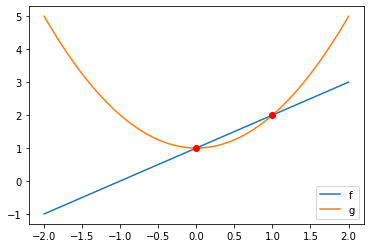

In [5]:
plt.plot(x,f(x),label='f')
plt.plot(x,g(x),label='g')
plt.plot(0,f(0),'ro')
plt.plot(1,f(1),'ro')
plt.legend()

In [6]:
x2 = np.linspace(1,1.1)

Text(0.5, 1.0, 'Zooming in on $x = [1,1.1]$\nNow they both look Linear!')

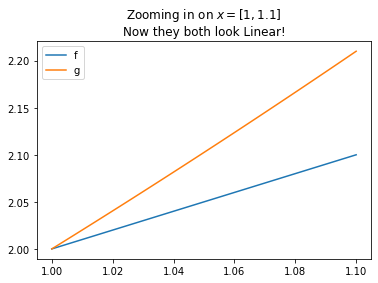

In [7]:
plt.plot(x2,f(x2),label='f')
plt.plot(x2,g(x2),label='g')
plt.legend()
plt.title('Zooming in on $x = [1,1.1]$\nNow they both look Linear!')

Text(0.5, 1.0, 'Zooming in on $x = [1,1.001,100]$\nNow they both look Linear!')

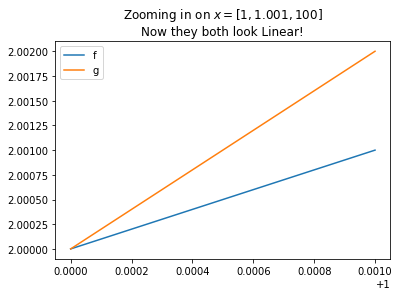

In [8]:
x2 = np.linspace(1,1.001,100)
plt.plot(x2,f(x2),label='f')
plt.plot(x2,g(x2),label='g')
plt.legend()
plt.title('Zooming in on $x = [1,1.001,100]$\nNow they both look Linear!')

Definition

$$
f'(x) = \lim_{h \to 0} \frac{f(x + h) - f(x)}{h} \
$$

Note: h is the distance, gets smaller and smaller so we can get the smalles possible variation of x (slope)

We can interpret the derivative in a few ways.  As we started looking at the difference between terms, we can consider the derivative as a measure of the rate of change of some sequence of numbers.

Similarly, if we have a closed form sequence rather than a sequence we can regard the derivative as a function that represents the rate of change of our original function.

## Derivative as Function with Python

First, we can investigate the derivative of a function using Sympy's `diff` function.  If we enter a symbolic expression $f$ in terms of some variable $x$, we will be able to get the derivative of this expression with `sy.diff(f, x)`.  A simple example follows.

In [9]:
def f(x):
    return x**2 - 2*x + 1

In [10]:
def df(x):
    h = 0.000001
    return (f(x + h) - f(x))/h

Text(0.5, 1.0, 'Function and its Derivative')

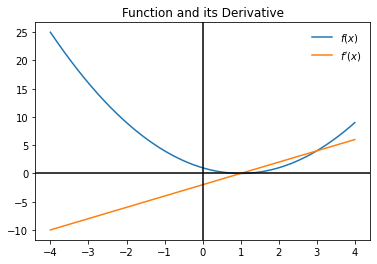

In [12]:
x = np.linspace(-4, 4, 1000)
plt.plot(x, f(x), label = '$f(x)$')
plt.plot(x, df(x), label = '$f\'(x)$')
plt.axhline(color = 'black')
plt.axvline(color = 'black')
plt.legend(loc = 'best', frameon = False)
plt.title("Function and its Derivative")

## A function a its derivative

Text(0.5, 1.0, 'Another function and its Derivative')

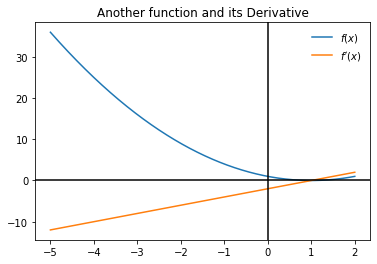

In [13]:
x = np.linspace(-5, 2, 1000)
plt.plot(x, f(x), label = '$f(x)$')
plt.plot(x, df(x), label = '$f\'(x)$')
plt.axhline(color = 'black')
plt.axvline(color = 'black')
plt.legend(frameon = False)
plt.title("Another function and its Derivative")

We can glean important information from the plot of the derivative about the behavior of the function we are investigating, particularly the maximum and minimum values.  Perhaps we would only have the plot of the derivative, can you tell where the max and min values occur?

Text(0.5, 1.0, 'Just the Derivative')

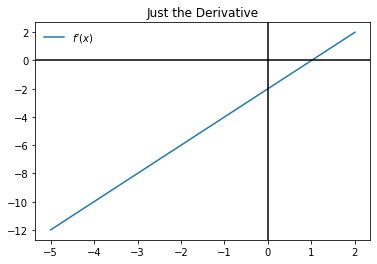

In [14]:
x = np.linspace(-5, 2, 1000)
plt.plot(x, df(x), label = '$f\'(x)$')
plt.axhline(color = 'black')
plt.axvline(color = 'black')
plt.legend(frameon = False)
plt.title("Just the Derivative")

In [15]:
x = sy.Symbol('x')
df = sy.diff(f(x), x)
df = sy.expand(df)
df

2*x - 2

# Derivative as Tangent Line

We can also interpret the derivative as the slope of a tangent line, or better yet an approximation for this tangent line.  For example, the derivative at some point $a$ can be thought of as the slope of the line through $a$ and some other point $a + \Delta x$ where $\Delta x$ is very small. 

Again, we would have something like:

$$f'(a) = \frac{f(a + \Delta x) - f(a)}{\Delta x}$$

for some arbitrarily small value of $\Delta x$.  We can also understand the expression above as providing us a means of approximating values close to $x = a$ using the tangent line.  If we rearrange terms, notice:

$$f(a + \Delta x) = f'(a)\Delta x + f(a)$$

What this does, is tells us the slope of the line tangent to the graph at the point $(a, f(a))$.  Suppose we have the function $f(x) = x^2$, and we want to know the slope of the tangent line at $x = 2$.  We can define a function as usual, and a function for the derivative.  We can use these to write an equation of the line tangent to the graph of the function at this point.  

In [16]:
def f(x):
    return x**2

def df(x):
    h = 0.00001
    return (f(x + h) - f(x))/h    

In [17]:
df(2)

4.000010000027032

In [21]:
def tan_plot(a):
    x = np.linspace((a-4), (a+4), 1000)
    y = df(a)*(x - a) + f(a)
    plt.plot(x, f(x))
    plt.plot(a, f(a), 'o', markersize = 10)
    plt.plot(x, y, '--k')
    plt.axhline(color = 'black')
    plt.axvline(color = 'black')

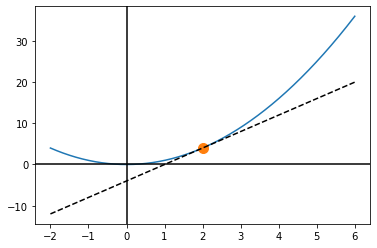

In [20]:
tan_plot(2)

In [22]:
def g(x):
    return x*(x+2)*(x - 3)

def dg(x):
    h = 0.000001
    return ((g(x+h)-g(x))/h)

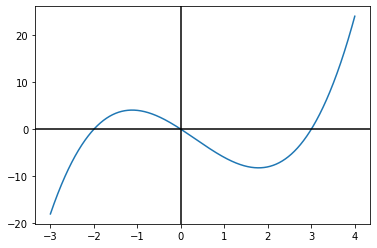

In [23]:
x = np.linspace(-3, 4, 1000)
plt.plot(x, g(x))
plt.axhline(color = 'black')
plt.axvline(color = 'black')

In [24]:
x = sy.Symbol('x')
df = sy.diff(g(x), x)
df = sy.simplify(df)
a, b = sy.solve(df, x)

In [25]:
a, b

(1/3 - sqrt(19)/3, 1/3 + sqrt(19)/3)

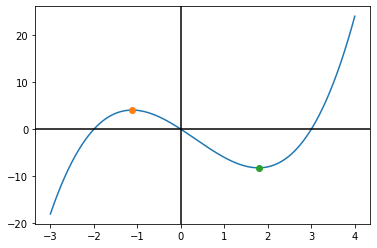

In [28]:
x = np.linspace(-3, 4, 1000)
plt.plot(x, g(x))
plt.axhline(color = 'black')
plt.axvline(color = 'black')
plt.plot(a, g(a), 'o')
plt.plot(b, g(b), 'o')

In [31]:
def tan_plot(a, b):
    x = np.linspace(-5,5, 1000)
    y1 = dg(a)*(x - a) + g(a)
    y2 = dg(b)*(x - b) + g(b)
    plt.plot(x, g(x))
    plt.plot(a, g(a), 'o', markersize = 10)
    plt.plot(b, g(b), 'o', markersize = 10)
    plt.plot(x, y1, '--k')
    plt.plot(x, y2, '--k')
    plt.ylim(-15, 15)
    plt.xlim(-4,4)
    plt.axhline(color = 'black')
    plt.axvline(color = 'black')

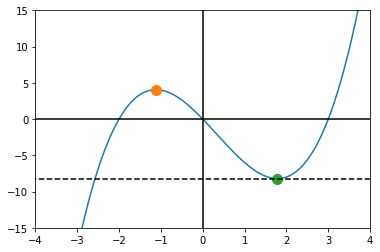

In [30]:
tan_plot(a, b)